In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("../laliga.sqlite")

query = "SELECT * FROM Matches;"  # Get Matches table

# Load data into a pandas DataFrame
matches_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(matches_df.head())

      season  division  matchday     date  time    home_team        away_team  \
0  1928-1929         1         1  2/10/29  None  Arenas Club  Athletic Madrid   
1  1928-1929         1         1  2/10/29  None     Espanyol       Real Unión   
2  1928-1929         1         1  2/10/29  None  Real Madrid        Catalunya   
3  1928-1929         1         1  2/10/29  None     Donostia         Athletic   
4  1928-1929         1         1  2/12/29  None       Racing        Barcelona   

  score  
0   2:3  
1   3:2  
2   5:0  
3   1:1  
4   0:2  


In [30]:
# Let's check what tables are in the database
conn = sqlite3.connect("../laliga.sqlite")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Available tables in the database:")
for table in tables:
    print(table[0])
conn.close()

Available tables in the database:
Predictions
Matches


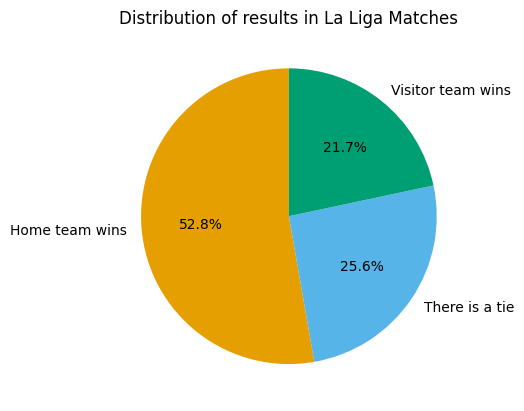

In [37]:
# Remove unplayed matches
matches_df = matches_df[matches_df["score"].notna()]
matches_df["home_goals"] = matches_df['score'].apply(lambda x: int(x.split(':')[0]) if isinstance(x, str) else None)
matches_df["away_goals"] = matches_df['score'].apply(lambda x: int(x.split(':')[1]) if isinstance(x, str) else None)
matches_df["winner"] = matches_df.apply(lambda row: 'home' if row['home_goals'] > row['away_goals'] else ('away' if row['home_goals'] < row['away_goals']  else 'draw'), axis=1)

# Count how many times each string, "home", "away" or "draw" appears
counts = matches_df['winner'].value_counts()
label_map = {
    'home': 'Home team wins',
    'away': 'Visitor team wins',
    'draw': 'There is a tie'
}

# Colorblind-friendly palette (Okabe & Ito)
colors = [
    '#E69F00',  # orange
    '#56B4E9',  # sky blue
    '#009E73',  # bluish green
    '#F0E442',  # yellow
    '#0072B2',  # blue
    '#D55E00',  # vermillion
    '#CC79A7'   # reddish purple
]


# Reindex with new labels
renamed_counts = counts.rename(index=label_map)# Make a pie chart
plt.pie(counts, labels=renamed_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(renamed_counts)])
plt.title('Distribution of results in La Liga Matches')
plt.show()

In [38]:
print(matches_df.head())

      season  division  matchday     date  time    home_team        away_team  \
0  1928-1929         1         1  2/10/29  None  Arenas Club  Athletic Madrid   
1  1928-1929         1         1  2/10/29  None     Espanyol       Real Unión   
2  1928-1929         1         1  2/10/29  None  Real Madrid        Catalunya   
3  1928-1929         1         1  2/10/29  None     Donostia         Athletic   
4  1928-1929         1         1  2/12/29  None       Racing        Barcelona   

  score  home_goals  away_goals winner  
0   2:3           2           3   away  
1   3:2           3           2   home  
2   5:0           5           0   home  
3   1:1           1           1   draw  
4   0:2           0           2   away  
